In [2]:
import math
import collections
import csv
import re
import numpy
from matplotlib import pyplot as plt
from pandas import Series
from pandas import DataFrame
import pandas as pd


# Preprocessing
# Part 1
euFile = open("EuCitiesTemperatures.csv")
eu = pd.read_csv(euFile)
eu

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [3]:
eu[eu['latitude'].isnull()] # Location of latitude nulls. A couple longitude nulls too.

,city,country,population,EU,coastline,latitude,longitude,temperature
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
7,Minsk,Belarus,9.48,no,no,NaN,27.57,5.28
8,Orsha,Belarus,9.48,no,no,NaN,NaN,4.93
9,Pinsk,Belarus,9.48,no,no,NaN,NaN,6.42
15,Plovdiv,Bulgaria,7.10,yes,yes,NaN,NaN,8.27
...,...,...,...,...,...,...,...,...
196,Zhytomyr,Ukraine,44.62,no,yes,NaN,NaN,6.67
204,Aberdeen,United Kingdom,65.11,yes,yes,NaN,-2.08,NaN
205,Birmingham,United Kingdom,65.11,yes,yes,NaN,-1.92,8.81
206,Bradford,United Kingdom,65.11,yes,yes,NaN,-1.75,NaN


In [8]:
eu.groupby('country').mean() # These are the mean values that we want.

,population,latitude,longitude,temperature
country,,,,
Albania,2.90,41.120000,20.080000,15.180000
Andorra,0.07,42.500000,1.520000,NaN
Austria,8.57,47.852000,14.022000,6.144000
Belarus,9.48,52.610000,25.638333,5.922000
Belgium,11.37,51.220000,3.230000,9.650000
Bosnia and Herzegovina,3.80,43.850000,13.380000,NaN
Bulgaria,7.10,43.050000,26.352000,9.893333
Croatia,4.23,45.330000,15.460000,10.865000
Czech Republic,10.55,49.703333,15.540000,7.856667


In [9]:
# Found this line on SO. Works like a charm.
eu['latitude'] = eu.groupby('country')['latitude'].transform(lambda x: x.fillna(x.mean()).round(2))
eu['longitude'] = eu.groupby('country')['longitude'].transform(lambda x: x.fillna(x.mean()).round(2))
eu.head(15) # Shows the first 15 which shows some of the NAN's filled.

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


In [10]:
# Part 2
subset = eu[eu['latitude'].between(40, 60, inclusive=True) & eu['longitude'].between(15, 30, inclusive=True)]
subset # All the values with the parameters stated. 
# I also get a warning here, which we could suppress by importing the warning library, but I ain't taking chances of points off since it's a different modules.
# Still works tho.

C:\Users\JTG~1\AppData\Local\Temp/ipykernel_17676/4086332619.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  subset = eu[eu['latitude'].between(40, 60, inclusive=True) & eu['longitude'].between(15, 30, inclusive=True)]


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,NaN
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


In [11]:
city_max = subset.groupby('country').count()['city'].sort_values(ascending=False) # This will get the countries with the highest city count.
city_max_table = DataFrame(city_max) # Make this into a DateFrame
city_max_table.reset_index()

,country,city
0,Romania,9
1,Poland,9
2,Belarus,6
3,Bulgaria,5
4,Hungary,4
5,Lithuania,3
6,Turkey,3
7,Serbia,3
8,Moldova,2
9,Sweden,2


In [12]:
# Part 3
eu['temperature'] = eu.groupby(['EU','coastline'])['temperature'].transform(lambda x: x.fillna(x.mean()).round(2))
eu.head(15) # We'll use the same line from Part 1 to get this result.

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
5,Salzburg,Austria,8.57,yes,no,47.81,14.02,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42


In [13]:
# Visualization
# Part 1
# First, we're gonna make a new dataframe that will group up the regions.
regions = eu.groupby(['EU', 'coastline']).count()['city'].to_frame('Cities')
regions

Cities
EU  coastline        
no  no             16
    yes            47
yes no             14
    yes           136

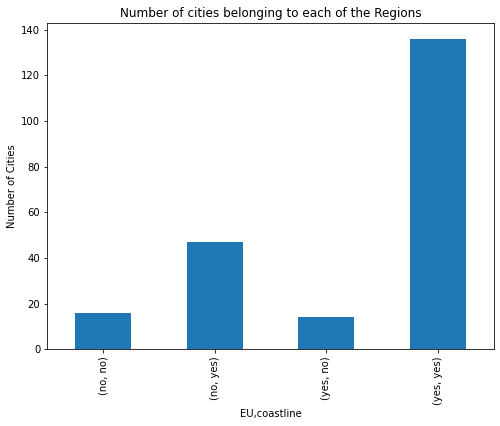

In [14]:
# Now we'll make it into a bar graph.
plt.figure(figsize = (8,6))
plt.title('Number of cities belonging to each of the Regions', fontsize=12)
plt.xlabel('Region', fontsize=10)
plt.ylabel('Number of Cities', fontsize=10)
regions['Cities'].plot(kind='bar')
plt.show()

In [15]:
# Part 2
# We're gonna make a dataframe that has the isolated data.
cityScatter = eu[['country', 'city', 'longitude', 'latitude', 'temperature']] # Create a new dataframe to hold specific items.
newCityScatter = cityScatter.groupby(['country', 'city', 'longitude', 'latitude']).count()['temperature'].to_frame() # Group the countries with their respective cities.
newCityScatter = newCityScatter.drop(['temperature'], axis=1) # Remove temperature now that we have it grouped.

In [16]:
newCityScatter = newCityScatter.reset_index() # Make it look better
newCityScatter # Result
# Most definitely didn't need to do the stuff above, but this looks cooler and works.

,country,city,longitude,latitude
0,Albania,Elbasan,20.08,41.12
1,Andorra,Andorra,1.52,42.50
2,Austria,Graz,14.02,47.08
3,Austria,Innsbruck,11.41,47.85
4,Austria,Linz,14.29,48.32
...,...,...,...,...
208,United Kingdom,Edinburgh,-2.94,55.95
209,United Kingdom,Exeter,-3.53,50.70
210,United Kingdom,Glasgow,-4.25,55.87
211,United Kingdom,Inverness,-4.23,53.55


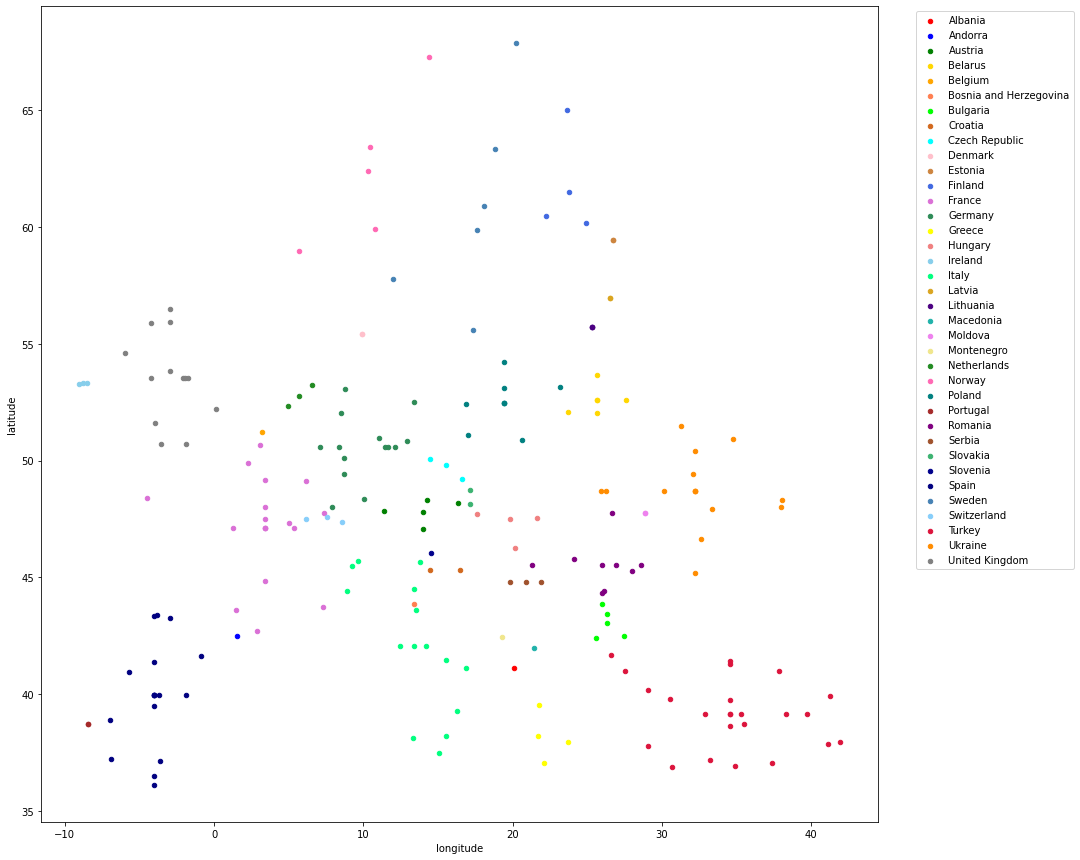

In [17]:
countrylist = newCityScatter['country'].unique() # Isolate the countries.

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,15)

# This process was annoying. Map every country to a color.
colors = ['red','blue','green','gold','orange','coral','lime','chocolate','aqua','pink','peru','royalblue','orchid','seagreen','yellow','lightcoral','skyblue','springgreen','goldenrod','indigo','lightseagreen','violet','khaki','forestgreen','hotpink','teal','brown','purple','sienna','mediumseagreen','darkblue','navy','steelblue','lightskyblue','crimson','darkorange','grey']
for countrylists,color in zip(countrylist,colors): # Now, we'll combine all the scatter plots into one. Refer to Apr.7 lecture.
    df = newCityScatter[newCityScatter['country'] == countrylists]
    df.plot('longitude','latitude',ax=ax,kind='scatter',color=color,label=countrylists)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

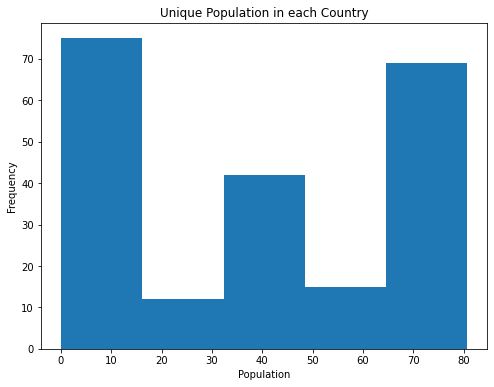

In [18]:
# Part 3
# Simple creation of a histogram.
plt.figure(figsize=(8, 6))
plt.title('Unique Population in each Country')
plt.xlabel('Population', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.hist(eu['population'], bins=5)
plt.show()

In [19]:
# Part 4
# Make a dataframe with the specified data.
visualize = eu[['city', 'EU', 'coastline', 'latitude', 'temperature']]

In [20]:
# Now we're going to make lists for every single combination for the x axis.
visualize1 = visualize[(visualize['EU'] == 'no') & (visualize['coastline'] == 'no')]
city_count1 = visualize1['city'].count()
city_count1List = []
for i in range(0, city_count1):
    city_count1List.append(i)

In [21]:
visualize2 = visualize[(visualize['EU'] == 'no') & (visualize['coastline'] == 'yes')]
city_count2 = visualize2['city'].count()
city_count2List = []
for i in range(0, city_count2):
    city_count2List.append(i)

In [22]:
visualize3 = visualize[(visualize['EU'] == 'yes') & (visualize['coastline'] == 'no')]
city_count3 = visualize3['city'].count()
city_count3List = []
for i in range(0, city_count3):
    city_count3List.append(i)

In [23]:
visualize4 = visualize[(visualize['EU'] == 'yes') & (visualize['coastline'] == 'yes')]
city_count4 = visualize4['city'].count()
city_count4List = []
for i in range(0, city_count4):
    city_count4List.append(i)

C:\Users\J T G\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\J T G\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


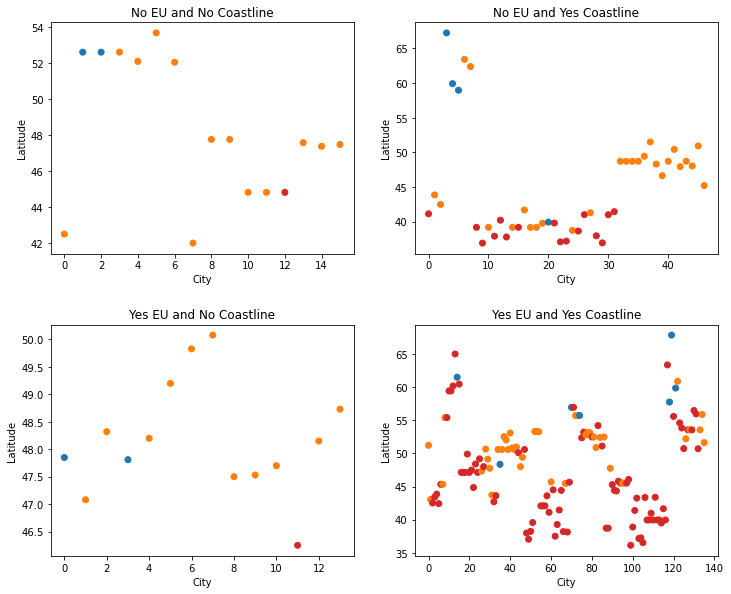

In [24]:
# Map the color values to their respective conditions. Do for every list.
visualize1.loc[visualize1['temperature'] > 10, 'color'] = 'R'
visualize1.loc[((visualize1['temperature'] >= 6) & (visualize1['temperature'] <= 10)), 'color'] = 'O'
visualize1.loc[visualize1['temperature'] < 6, 'color'] = 'B'

visualize2.loc[visualize2['temperature'] > 10, 'color'] = 'R'
visualize2.loc[((visualize2['temperature'] >= 6) & (visualize2['temperature'] <= 10)), 'color'] = 'O'
visualize2.loc[visualize2['temperature'] < 6, 'color'] = 'B'

visualize3.loc[visualize3['temperature'] > 10, 'color'] = 'R'
visualize3.loc[((visualize3['temperature'] >= 6) & (visualize3['temperature'] <= 10)), 'color'] = 'O'
visualize3.loc[visualize3['temperature'] < 6, 'color'] = 'B'

visualize4.loc[visualize4['temperature'] > 10, 'color'] = 'R'
visualize4.loc[((visualize4['temperature'] >= 6) & (visualize4['temperature'] <= 10)), 'color'] = 'O'
visualize4.loc[visualize4['temperature'] < 6, 'color'] = 'B'

# Begin the graph creation.
fig, axes = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(h_pad=5.0,w_pad=3.0)

colors = {'R':'tab:red', 'O':'tab:orange', 'B':'tab:blue'}

# red = above 10
# orange = between 6 and 10 (inclusive)
# blue = below 6

# first figure for 'No EU and No Coastline'
lat1 = visualize1['latitude']
axes[0][0].scatter(city_count1List,lat1.values, c=visualize1['color'].map(colors))
axes[0][0].set_title('No EU and No Coastline')
axes[0][0].set_xlabel('City')
axes[0][0].set_ylabel('Latitude')

# second figure for 'No EU and Yes Coastline'
lat2 = visualize2['latitude']
axes[0][1].scatter(city_count2List,lat2.values, c=visualize2['color'].map(colors))
axes[0][1].set_title('No EU and Yes Coastline')
axes[0][1].set_xlabel('City')
axes[0][1].set_ylabel('Latitude')

# third figure for 'Yes EU and No Coastline'
lat3 = visualize3['latitude']
axes[1][0].scatter(city_count3List,lat3.values, c=visualize3['color'].map(colors))
axes[1][0].set_title('Yes EU and No Coastline')
axes[1][0].set_xlabel('City')
axes[1][0].set_ylabel('Latitude')

# fourth figure for 'Yes EU and Yes Coastline'
lat4 = visualize4['latitude']
axes[1][1].scatter(city_count4List,lat4.values, c=visualize4['color'].map(colors))
axes[1][1].set_title('Yes EU and Yes Coastline')
axes[1][1].set_xlabel('City')
axes[1][1].set_ylabel('Latitude')

plt.show()